In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [97]:
# load data from csv file into pandas dataframe
poke_df = pd.read_csv('./data/pokemon_data_csv/pokemon.csv')

In [99]:
# filter dataframe to include only generation 1 pokemon
poke_df = poke_df.loc[poke_df['Generation'] == 1]

In [100]:
# using tilde which is bitwise not, to invert mask dropping mega versions of pokemon
poke_df = poke_df[~poke_df['Name'].str.contains('Mega')].reset_index(drop=True)

In [101]:
# create list of unique pokemon types
list(poke_df['Type 1'].unique())

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon']

In [31]:
grass_poke_df = poke_df.loc[poke_df['Type 1'] == 'Grass']

In [30]:
fire_poke_df = poke_df.loc[poke_df['Type 1'] == 'Fire']

In [84]:
psychic_poke_df = poke_df.loc[poke_df['Type 1'] == 'Psychic']

In [47]:
grass_pokemon = list(grass_poke_df['Name'].unique())
y_pos = np.arange(len(grass_pokemon))
grass_hitpoints = list(grass_poke_df['HP'])

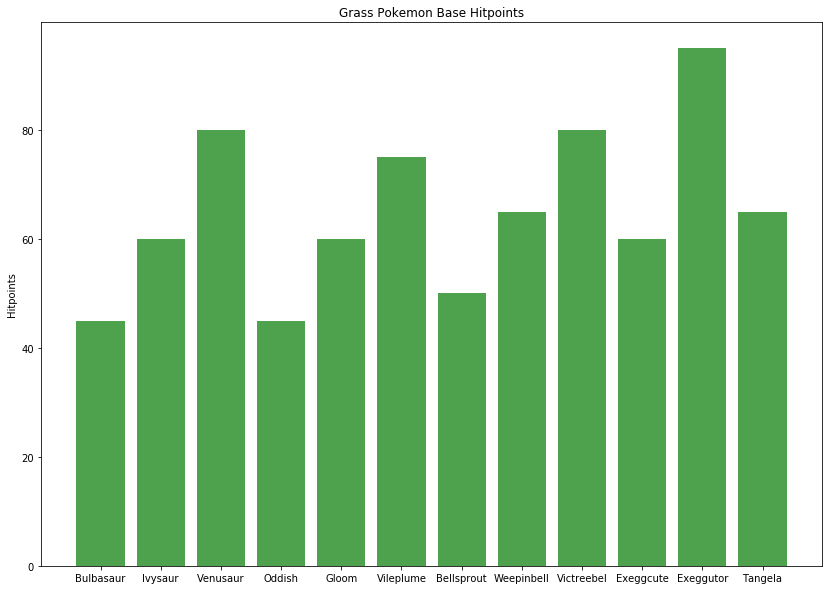

In [65]:
plt.figure(figsize=(14,10))
plt.bar(y_pos, grass_hitpoints, align='center', alpha=0.8, color='forestgreen')
plt.xticks(y_pos, grass_pokemon)
plt.yticks()
plt.ylabel('Hitpoints')
plt.title('Grass Pokemon Base Hitpoints')
plt.show()

In [96]:
grass_poke_df.to_csv('./data/pokemon_data_csv/grass_pokemon.csv')

In [95]:
fire_poke_df.to_csv('./data/pokemon_data_csv/fire_pokemon.csv')

In [94]:
psychic_poke_df.to_csv('./data/pokemon_data_csv/psychic_pokemon.csv')

In [103]:
grass_poke_df = grass_poke_df.drop(['#'], axis=1)
fire_poke_df = fire_poke_df.drop(['#'], axis=1)
psychic_poke_df = psychic_poke_df.drop(['#'], axis=1)

In [110]:
grass_dc = grass_poke_df.to_json(orient='records')
fire_dc = fire_poke_df.to_json(orient='records')
psychic_dc = psychic_poke_df.to_json(orient='records')

In [113]:
with open('./data/pokemon_data_json/grass_pokemon.json', 'w', encoding='utf-8') as f:
    json.dump(grass_dc, f, ensure_ascii=False, indent=4)
with open('./data/pokemon_data_json/fire_pokemon.json', 'w', encoding='utf-8') as f:
    json.dump(fire_dc, f, ensure_ascii=False, indent=4)
with open('./data/pokemon_data_json/psychic_pokemon.json', 'w', encoding='utf-8') as f:
    json.dump(psychic_dc, f, ensure_ascii=False, indent=4)